In [2]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from math import sqrt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#cross validation
from sklearn.model_selection import train_test_split


In [3]:
from feature_engine.discretisers import EqualWidthDiscretiser

In [4]:
data = pd.read_csv("Credit_One_DataSet.csv")

In [5]:
data.head()

,LIMIT_BAL,DPNM,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,1,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,120000,1,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,0,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
#data = data[data['DPNM']==1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   DPNM       30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [7]:
SEED=123

In [8]:
data = data.drop(['SEX','MARRIAGE','DPNM'], axis=1)
data = data.sample(1000, random_state=SEED) #Obtengo el mismo resultado con 30000

In [9]:
data.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25665,40000,2,26,-1,0,0,0,-1,0,28991,...,13600,0,44024,18697,1300,1000,0,22373,680,10000
16464,80000,3,59,0,0,0,0,0,0,75662,...,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006
22386,170000,1,30,2,2,2,2,2,2,155910,...,161487,157577,168094,170922,6800,6500,0,13000,5500,1000
10149,200000,2,41,-2,-2,-2,-2,-2,-2,23570,...,0,0,0,0,742,0,0,0,0,0
8729,50000,2,43,0,0,0,0,0,0,8214,...,9044,9225,9417,9617,1140,1150,331,341,356,330


In [10]:
data['BILL_AMT_total']=data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6']
data['PAY_AMT_total']=data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6']
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 25665 to 10093
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LIMIT_BAL       1000 non-null   int64
 1   EDUCATION       1000 non-null   int64
 2   AGE             1000 non-null   int64
 3   PAY_0           1000 non-null   int64
 4   PAY_2           1000 non-null   int64
 5   PAY_3           1000 non-null   int64
 6   PAY_4           1000 non-null   int64
 7   PAY_5           1000 non-null   int64
 8   PAY_6           1000 non-null   int64
 9   BILL_AMT1       1000 non-null   int64
 10  BILL_AMT2       1000 non-null   int64
 11  BILL_AMT3       1000 non-null   int64
 12  BILL_AMT4       1000 non-null   int64
 13  BILL_AMT5       1000 non-null   int64
 14  BILL_AMT6       1000 non-null   int64
 15  PAY_AMT1        1000 non-null   int64
 16  PAY_AMT2        1000 non-null   int64
 17  PAY_AMT3        1000 non-null   int64
 18  PAY_AMT4        1000 no

In [196]:
## X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
#X = data.iloc[:,[2,3,5,6,21,22]]
X = data.iloc[:,[2,5,21,22]]
#X = data.iloc[:,[22]]

In [197]:
print("Features sample")
X.head()

Features sample


,AGE,PAY_3,BILL_AMT_total,PAY_AMT_total
25665,26,0,129703,35353
16464,59,0,349621,12830
22386,30,2,972809,32800
10149,41,-2,24305,742
8729,43,0,53551,3648


In [198]:
#data_d = EqualWidthDiscretiser(bins=10, variables = ['AGE'])
#data_d.fit(data)
#data_t = data_d.transform(data)
#data_t.head(30)
#data = data_t

In [199]:
y = data['LIMIT_BAL']
print(y)

25665     40000
16464     80000
22386    170000
10149    200000
8729      50000
          ...  
4427     200000
948      470000
20532    180000
22839    120000
10093    210000
Name: LIMIT_BAL, Length: 1000, dtype: int64


In [200]:
#Algorithms
lr = LinearRegression()
#svr_alg   = SVR(kernel='poly', C=3, gamma='auto', degree=3, epsilon=.1,
#               coef0=1) #This case take too much time and never converge
svr_alg   = SVR()

In [201]:
#rf = RandomForestRegressor(n_estimators=100, max_depth=30,random_state=SEED) #R2 =0.92 (train sample), R2 = 0.42 (test sample)
#rf = RandomForestRegressor(n_estimators=100, max_depth=30,min_samples_leaf=15,random_state=SEED) #R2 =0.54 (train sample), R2 = 0.47 (test sample)
#rf = RandomForestRegressor(n_estimators=100, max_depth=30,min_samples_leaf=15,max_features=2,random_state=SEED) #R2 =0.50 (train sample), R2 = 0.47 (test sample)

In [202]:
#Using only the default sample
#rf = RandomForestRegressor(n_estimators=100,random_state=SEED) #R2 =0.92 (train sample), R2 = 0.39 (test sample)
#rf = RandomForestRegressor(n_estimators=100, max_depth=30,random_state=SEED) #R2 =0.93 (train sample), R2 = 0.36 (test sample)
#rf = RandomForestRegressor(n_estimators=1000, max_depth=100,min_samples_split=5, min_samples_leaf=10,max_features=sqrt,bootstrap=True,random_state=SEED) 
#rf = RandomForestRegressor(n_estimators=100, max_depth=30,min_samples_leaf=15,max_features=2,random_state=SEED) 

In [203]:
rf = RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',min_samples_leaf=2,
                           min_samples_split=2,n_estimators=10, random_state=SEED)

In [204]:
# list of algorithms
# Set n_jobs to -1 in order to exploit all CPU cores in computation
algos_Class = []
algos_Class.append(('Random Forest Regressor', rf))
algos_Class.append(('Linear Regression', lr))
algos_Class.append(('Epsilon-Support Vector Regression', svr_alg))

In [205]:
#Building and assesing models
scores = []
names = []
for name, model in algos_Class:
    score = cross_val_score(model, X,y, cv=5, scoring='r2')
    names.append(name)
    scores.append(score)

In [206]:
#Output
for i in range(len(names)):
    print(names[i],scores[i].mean())

Random Forest Regressor 0.37354971404838155
Linear Regression 0.2698294687064823
Epsilon-Support Vector Regression -0.049106436916232135


In [207]:
# Split data into 80% train and 20% test. We will try also 70% and 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [208]:
rf.fit(X_train, y_train)
#lr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=10, random_state=123)

In [209]:
y_predict = rf.predict(X_test)
#y_predict = lr.predict(X_test)

In [210]:
mae_test = MAE(y_test, y_predict)
# Print the test set MAE
print('Test set MAE of rf: {:.2f}'.format(mae_test))

Test set MAE of rf: 63674.18


In [211]:
mse_test = sqrt(MSE(y_test, y_predict))
# Print the test set MSE
print('Test set MSE of rf: {:.2f}'.format(mse_test))

Test set MSE of rf: 89925.01


In [212]:
r2_score_test = r2_score(y_test, y_predict)
print('R2 Score of rf: {:.2f}'.format(r2_score_test))

R2 Score of rf: 0.45


In [213]:
print(rf.score(X_train, y_train))

0.5446759055567341


In [214]:
print(rf.score(X_test, y_test))

0.44865740590317027


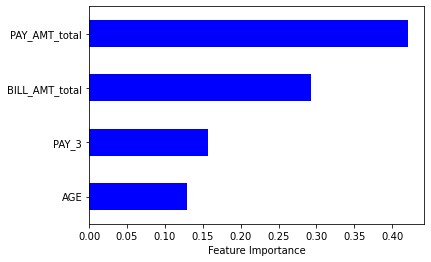

In [215]:
# See Feature importance
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
#Sort importances
sorted_importances_rf = importances_rf.sort_values()
#Show
sorted_importances_rf.plot(kind='barh', color='blue')
plt.xlabel("Feature Importance")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16e61e460>,
 'caps': [<matplotlib.lines.Line2D at 0x16e61eb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e61e100>],
 'medians': [<matplotlib.lines.Line2D at 0x16e62a220>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e62a580>],
 'means': []}

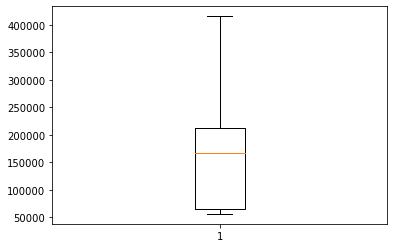

In [216]:
plt.boxplot(y_predict)
#plt.box(X_test['PAY_AMT_total'], y_test)
#plt.box(X_test['PAY_AMT_total'], y_predict)



In [217]:
print(rf.n_features_)

4
